<a href="https://colab.research.google.com/github/Himasri15/Time-series/blob/main/timeseriesminpro3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. importing the libraries and loading the Dataset

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [149]:
df = pd.read_csv('/content/drive/MyDrive/Datascience/Time series 14-12-2020/EnergyProduction.csv',index_col =0,parse_dates=True)

In [150]:
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [152]:
df.dropna()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321
...,...
1989-08-01,75.2704
1989-09-01,69.5107
1989-10-01,66.0620


# 2. Assign freq of "MS" to DataTimeIndex

In [153]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

In [154]:
df.index.freq = 'MS' #month start freq

In [155]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

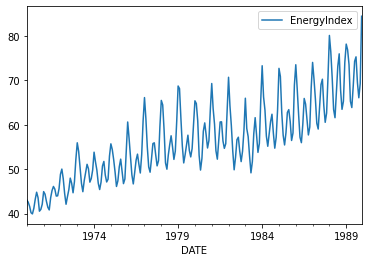

In [156]:
df.plot()

# 3. Adding a column that shows 12months using simple moving avg 

In [158]:
df['sma'] = df['EnergyIndex'].rolling(window=12).mean()

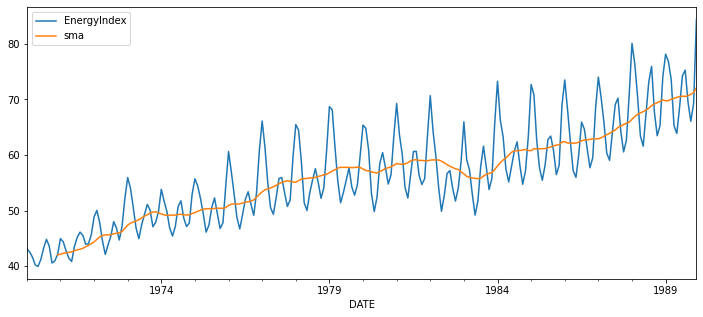

In [159]:
df.plot(figsize=(12,5))

# 4.Adding a column that shows the Exponentially weighted moving avg(ewma) with span of 12 using statsmodels SimpleExpSmoothing function
## -> simple exp smoothing method

In [161]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [162]:
df['ses12']= SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=2/(12+1),optimized=False).fittedvalues.shift(-1)

In [163]:
df.head()

,EnergyIndex,sma,ses12
DATE,,,
1970-01-01,43.0869,NaN,43.086900
1970-02-01,42.5577,NaN,43.005485
1970-03-01,41.6215,NaN,42.792564
1970-04-01,40.1982,NaN,42.393431
1970-05-01,39.9321,NaN,42.014765


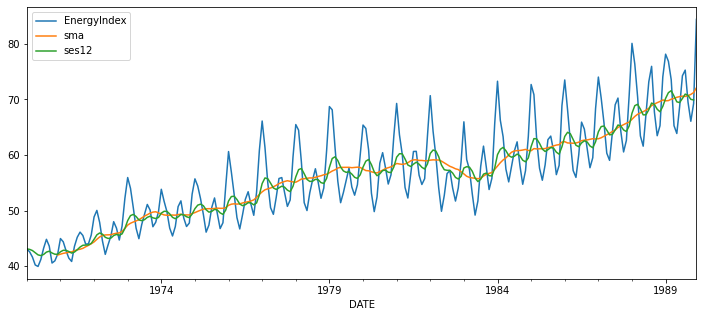

In [164]:
df.plot(figsize=(12,5))

# 5. adding a column to dataframe that shows the holtwinters fitted model using "DOUBLE EXPONENTIAL SMOOTHING" with both additive and multiplicative models 

In [166]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [167]:
df['dob_add12'] = ExponentialSmoothing(df['EnergyIndex'],trend = 'add').fit().fittedvalues.shift(-1)

In [168]:
df.columns

Index(['EnergyIndex', 'sma', 'ses12', 'dob_add12'], dtype='object')

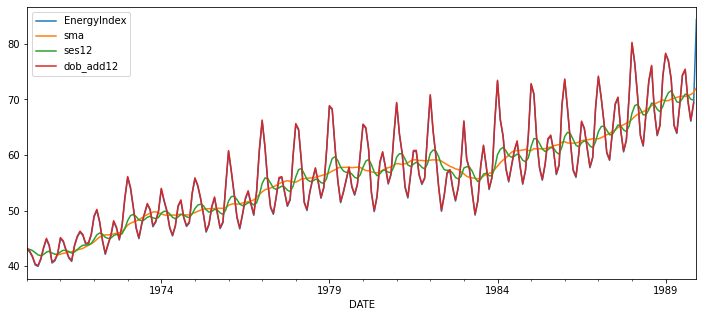

In [169]:
df[['EnergyIndex','sma', 'ses12', 'dob_add12']].plot(figsize=(12,5))

# 5.2 -> we are also checking for mul(non linear)

In [171]:
df['dob_mul12'] = ExponentialSmoothing(df['EnergyIndex'],trend = 'mul').fit().fittedvalues.shift(-1)

In [172]:
df.columns

Index(['EnergyIndex', 'sma', 'ses12', 'dob_add12', 'dob_mul12'], dtype='object')

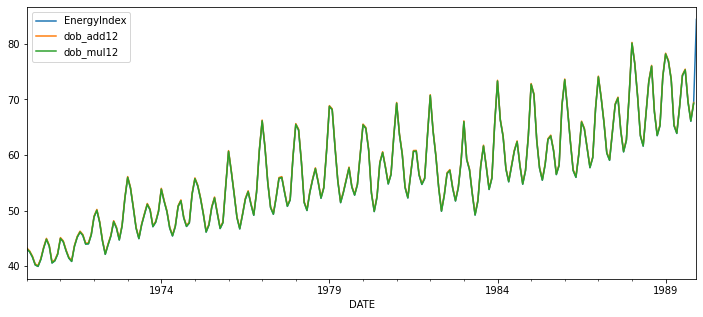

In [173]:
df[['EnergyIndex','dob_add12','dob_mul12']].plot(figsize=(12,5))

# 6. adding a column to dataframe that shows the holtwinters fitted model using "TRIPLE EXPONENTIAL SMOOTHING" with both additive and multiplicative models 

In [176]:
df['tes_mul12'] = ExponentialSmoothing(df['EnergyIndex'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [177]:
df.head()

,EnergyIndex,sma,ses12,dob_add12,dob_mul12,tes_mul12
DATE,,,,,,
1970-01-01,43.0869,NaN,43.086900,43.259773,43.114462,43.087479
1970-02-01,42.5577,NaN,43.005485,42.730573,42.584924,41.068033
1970-03-01,41.6215,NaN,42.792564,41.794373,41.648125,39.724705
1970-04-01,40.1982,NaN,42.393431,40.371073,40.223914,37.962045
1970-05-01,39.9321,NaN,42.014765,40.104973,39.957644,38.600767


In [178]:
df.columns

Index(['EnergyIndex', 'sma', 'ses12', 'dob_add12', 'dob_mul12', 'tes_mul12'], dtype='object')

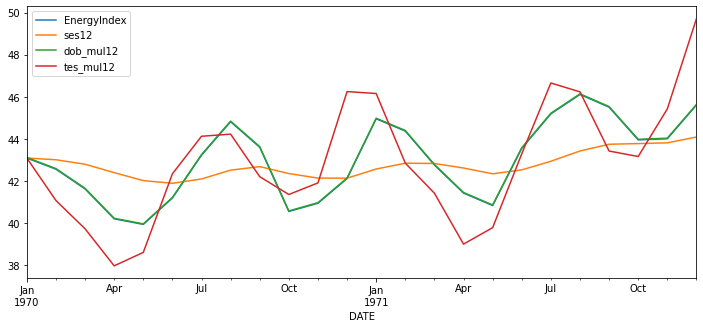

In [179]:
df[['EnergyIndex','ses12', 'dob_mul12','tes_mul12']].iloc[:24].plot(figsize=(12,5))

# 7. plotting same as above but taking first 2 years

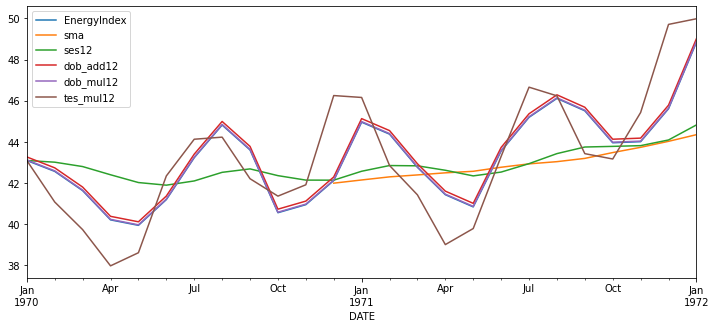

In [181]:
df[:'1972-01-01'].plot(figsize=(12,5))